# Simple circuits 2026

In [1]:
# qiskit 2.3.0

## 1. Toffoli circuit

### Part (a)

Begin by running this circuit on the simulator.

### Creating the circuit

In [2]:
from qiskit import *

In [3]:
import qiskit
print(qiskit.__version__)

2.3.0


In [4]:
# create 3 quantum registers, one for each qubit
q=QuantumRegister(3)
# create 3 corresponding classical registers (needed for storing measurement results)
c=ClassicalRegister(3)
# create a quantum circuit with these registers
toffoli = QuantumCircuit(q,c)
# NOT gates on q[1] and q[2]
toffoli.x(q[1])
toffoli.x(q[2])
# barrier to prevent gate reordering (not necessary, but makes visualization look nice) 
toffoli.barrier()
# double-controlled-NOT (Toffoli) gate; controls={q[2],q[1]};  target=q[0]
toffoli.ccx(q[2], q[1], q[0])
# cNOT (controlled-NOT) gate; control=q[2];  target=q[1]
toffoli.cx(q[2],q[1])
toffoli.barrier()
# measurement gates
toffoli.measure(q, c)

### Visualizing the circuit

In [5]:
toffoli.draw(initial_state=True)

░ ┌───┐      ░ ┌─┐      
q0_0: |0>──────░─┤ X ├──────░─┤M├──────
         ┌───┐ ░ └─┬─┘┌───┐ ░ └╥┘┌─┐   
q0_1: |0>┤ X ├─░───■──┤ X ├─░──╫─┤M├───
         ├───┤ ░   │  └─┬─┘ ░  ║ └╥┘┌─┐
q0_2: |0>┤ X ├─░───■────■───░──╫──╫─┤M├
         └───┘ ░            ░  ║  ║ └╥┘
 c0: 0 3/══════════════════════╩══╩══╩═
                               0  1  2

### Executing the circuit on the local Aer simulator

In [6]:
from qiskit_aer.primitives import SamplerV2 as AerSampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer import AerSimulator

In [7]:
backend = AerSimulator()
sampler = AerSampler()

In [8]:
# Transpile the circuit for the simulator
pm = generate_preset_pass_manager(optimization_level=1, backend=backend)
toffoli_isa = pm.run(toffoli)

In [9]:
job_sim = sampler.run([toffoli_isa], shots=4096)
result_sim = job_sim.result()[0] # Get results for the first circuit

In [10]:
# Print the DataBin to see what's inside
list(result_sim.data.keys())

['c0']

In [11]:
counts_sim = result_sim.data.c0.get_counts()
print(counts_sim)

{'101': 4096}


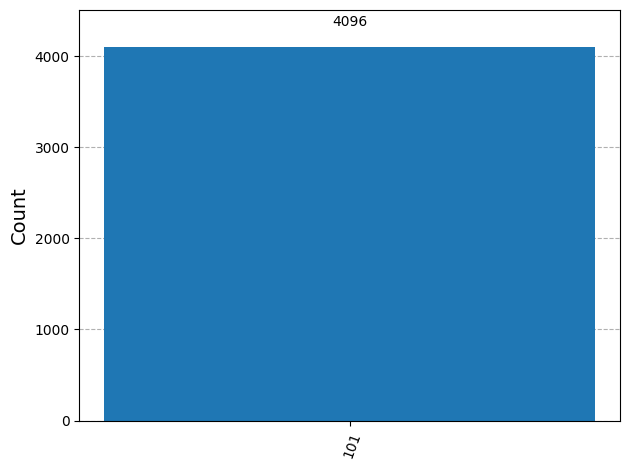

In [12]:
# Plot a histogram of the results
from qiskit.visualization import plot_histogram
plot_histogram(counts_sim)

### Explain what the circuit does

### 1a. sol:

This circuit prepares the state $$ |\psi\rangle = |101\rangle$$ from the initial state $$|\psi\rangle\ = |000\rangle$$

The result of the circuit is explicitly this state. The circuit exists to prepare this state.

### Part (b)

Re-run the circuit on the simulator. Do the results change? Why or why not?

### ANSWER

No, because the prepared state is only a linear superposition of 1 basis state, this being $|101\rangle$, thus the circuit is deterministic.

### Part (c) 

Run the circuit on a real device. Compare with the simulation, and account for differences.

### Executing the circuit on a real device 

In [12]:
from qiskit_ibm_runtime import QiskitRuntimeService

In [29]:
# Run this once to save your account to your Mac
import os
QISKIT_API_KEY = os.getenv("QISKIT_API_KEY")
QiskitRuntimeService.save_account(
    channel="ibm_quantum_platform", 
    token=QISKIT_API_KEY,
    overwrite=True
)

In [17]:
# Initialize the service
service = QiskitRuntimeService(instance="open-instance")

In [18]:
# Filter for real hardware (not simulators) that is currently operational
backend = service.least_busy(simulator=False, operational=True)
print(f"Running on: {backend.name}")

Running on: ibm_marrakesh


In [19]:
backend.name

'ibm_marrakesh'

In [20]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
pm = generate_preset_pass_manager(optimization_level=1, backend=backend)
isa_toffoli = pm.run(toffoli)

In [21]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
# Initialize the Sampler for your backend
sampler = Sampler(mode=backend)

In [22]:
# Submit the job
job_exp = sampler.run([isa_toffoli])
job_exp.job_id()

'd698kvje4kfs73d3tjug'

In [24]:
job_exp.status()

'DONE'

In [25]:
job_exp.status()

'DONE'

In [26]:
# If there is an error
#job_exp.error_message()

In [27]:
# Alternative:
# retrieved_job = service.job(job_id)
# result_exp = retrieved_job.result()

In [28]:
result_exp = job_exp.result()[0]


In [29]:
# Print the DataBin to see what's inside
list(result_exp.data.keys())

['c0']

In [30]:

counts_exp = result_exp.data.c0.get_counts()
print(counts_exp)

{'101': 3899, '100': 63, '011': 44, '110': 15, '010': 32, '001': 23, '111': 19, '000': 1}


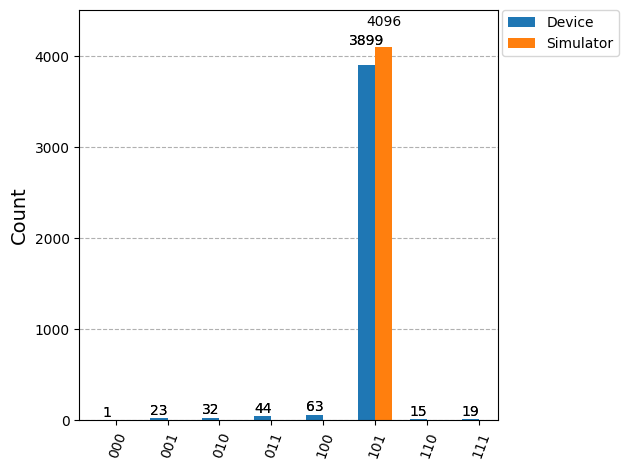

In [31]:
from qiskit.visualization import plot_histogram
plot_histogram([counts_exp,counts_sim], legend=['Device', 'Simulator'])

> ### 1C

*Compare with the simulation, and account for differences*

The measured states in the quantum device are not far from the expected ones, but deviate from theory nontheless. This can be attributed to noise and error in gate operators, the qubit measurements, and maybe also the qubit stability itself. That also explains measured states that were considered impossible, aka anything that wasnt $|101\rangle$


## 2. Bell circuit

### Part (a)

Begin by running this circuit on the simulator.

Briefly explain what this circuit does, and the result of the computation.

### Creating the circuit

In [10]:
from qiskit import *

In [11]:
q=QuantumRegister(2)
c=ClassicalRegister(2)
bell = QuantumCircuit(q,c)
bell.h(q[0])
bell.cx(q[0],q[1])
bell.barrier()
bell.measure(q, c)

### Visualizing the circuit

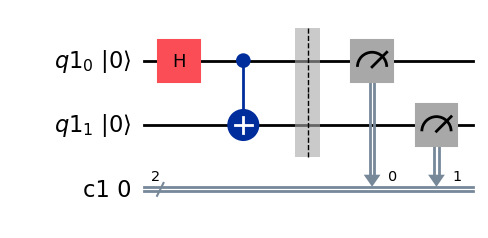

In [12]:
bell.draw(output="mpl",  initial_state=True)

### Executing the circuit on the local Aer simulator

In [13]:
from qiskit_aer.primitives import SamplerV2 as AerSampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer import AerSimulator

backend = AerSimulator()
sampler = AerSampler()

In [14]:
pm = generate_preset_pass_manager(optimization_level=1, backend=backend)
bell_isa = pm.run(bell)

In [15]:
job_sim = sampler.run([bell_isa], shots=4096)
result_sim = job_sim.result()[0] 


In [16]:
list(result_sim.data.keys())

['c1']

In [17]:
counts_sim = result_sim.data.c1.get_counts()
print(counts_sim)

{'00': 2091, '11': 2005}


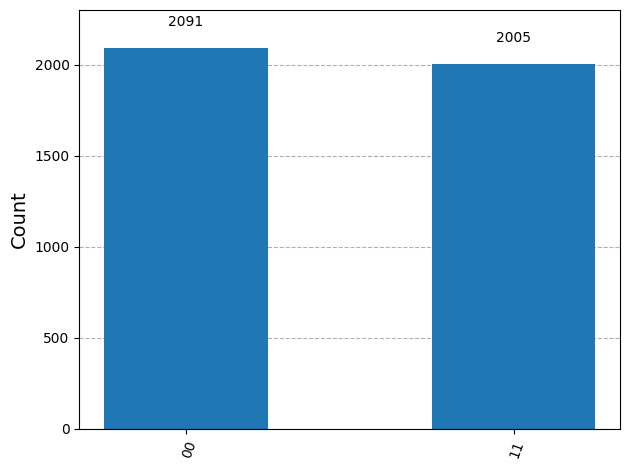

In [18]:
from qiskit.visualization import plot_histogram
plot_histogram(counts_sim)

> ### 1a. Explain what the circuit does

Prepares the state $|\psi\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$, which is a Bell state that ensures (maximum?) entanglement between qubits 0 and 1 (think this goes back to entanglement entropy, which was discussed in lecture but not sure). When measured, collapses to $|00\rangle$ or $|11\rangle$ with equal probability.

### Part (b)

Re-run the circuit on the simulator. Do the results change? Why or why not?

Yes, the AerSimulator provides realistic noise models, which will return noisy results that deviate slighly from the theoretical prediction.

blah

### Part (c)

Run the circuit on a real device. Compare with the simulation, and account for differences.

### Executing the circuit on a real device

In [19]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService()
backend = service.least_busy(simulator=False, operational=True)
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
pm = generate_preset_pass_manager(optimization_level=1, backend=backend)

from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)

qiskit_runtime_service.__init__:WARNING:2026-02-15 22:25:58,655: Instance was not set at service instantiation. Free and trial plan instances will be prioritized. Based on the following filters: (tags: None, region: us-east, eu-de), and available plans: (open), the available account instances are: open-instance. If you need a specific instance set it explicitly either by using a saved account with a saved default instance or passing it in directly to QiskitRuntimeService().
qiskit_runtime_service.backends:WARNING:2026-02-15 22:25:59,572: Loading instance: open-instance, plan: open
qiskit_runtime_service.backends:WARNING:2026-02-15 22:26:01,545: Using instance: open-instance, plan: open


In [20]:
backend.name

'ibm_marrakesh'

In [21]:
isa_bell=pm.run(bell)

In [22]:
job_exp = sampler.run([isa_bell])
job_exp.job_id()

'd698sltbujdc73d1tdg0'

In [23]:
job_exp.status()

'RUNNING'

In [25]:
job_exp.status()

'DONE'

In [26]:
result_exp = job_exp.result()
pub_result = result_exp[0]
list(pub_result.data.keys())

['c1']

In [27]:
counts_exp = pub_result.data.c1.get_counts()
print(counts_exp)

{'11': 1966, '00': 2023, '10': 60, '01': 47}


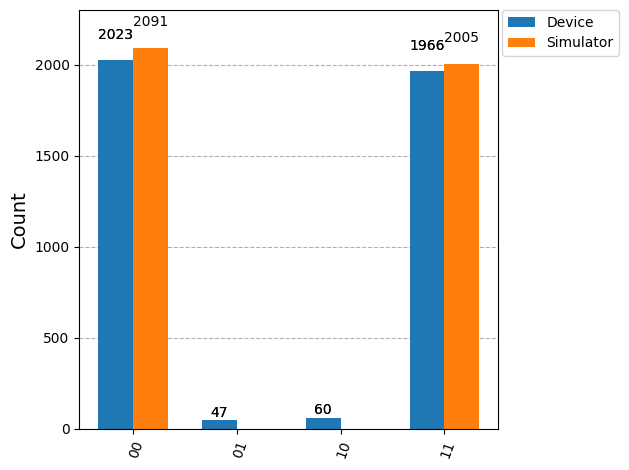

In [28]:
plot_histogram([counts_exp,counts_sim], legend=['Device', 'Simulator'])

### 2c. Comparison with Simulation

Like the previous circuit, the device results arrive close to the simulated results, but with some noise, including some states that were not possible in the simulation. Overall, I'd say the simulation is a good representation of the device.

## 3. Dense coding circuits

### Part (a)

Run the circuit for the case 11 on the simulator. Does it give the expected result?

#### The case 11

In [ ]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
dense11 = QuantumCircuit(q,c)
# We create an entangled pair of qubits; Alice has one (q[0]) , and Bob has the other one (q[1])
dense11.h(q[0])
dense11.cx(q[0], q[1])
dense11.barrier()
# To send the message 11, Alice applies first X and then Z to her qubit
dense11.x(q[0])
dense11.z(q[0])
dense11.barrier()
# Alice now sends her qubit to Bob
# Now that Bob has both qubits, he proceeds to retrieve Alice's message 
# Bob applies a cNOT and then H
dense11.cx(q[0], q[1])
dense11.h(q[0])
dense11.barrier()
# Bob then measures both qubits
dense11.measure(q, c)

### Visualizing the circuit

In [ ]:
dense11.draw(output="mpl", initial_state=True)

### Executing the circuit on the local Aer simulator

In [ ]:

#from qiskit_aer.primitives import SamplerV2 as AerSampler
#from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
#from qiskit_aer import AerSimulator

In [ ]:
backend = AerSimulator()
sampler = AerSampler()

In [ ]:
pm = generate_preset_pass_manager(optimization_level=1, backend=backend)
dense11_isa = pm.run(dense11)

In [ ]:
job_sim = sampler.run([dense11_isa], shots=4096)
result_sim = job_sim.result()[0] 
list(result_sim.data.keys())

In [ ]:
counts_sim = result_sim.data.c2.get_counts()
print(counts_sim)

### Part (b)

Modify the code, and run on the simulator, for the other three cases (namely, 01, 10 and 00). Make sure the circuits are drawn for each of the cases. Do you obtain the expected results?

### Part (c)

Run the circuit for the case 11 on a real device; compare with the simulation, and account for differences.

### Executing the 11 circuit on a real device

## 4. Teleportation

Consider the teleportation circuit.

Note that the ``unknown'' state here is given by

$$ |\psi\rangle = R^{(y)}(\alpha)\, |0\rangle 
   = e^{i \alpha\, \sigma^{y} /2} |0\rangle = 
   \cos(\tfrac{\alpha}{2}) |0\rangle  - \sin(\tfrac{ \alpha}{2}) 
     |1\rangle $$


with $\alpha = \pi/4$. (Recall Equations (7) and (8) in Problem Set 1 !)

### Part (a)

For this state $|\psi\rangle$, compute (by hand, or python, or Mathematica) the probabilities

$$ \big\vert\langle 0|\psi\rangle\big\vert^{2}  \qquad \text{ and } \qquad
	\big\vert\langle 1|\psi\rangle\big\vert^{2} $$

### Part (b)

Run this circuit on the simulator. Briefly explain what this circuit does.

### Creating the circuit

In [ ]:
# from qiskit import *

In [ ]:
# We need 3 qubits: one qubit for the "unknown" state to be teleported, and two qubits for the entangled pair
q = QuantumRegister(3)
# corresponding classical registers
c0 = ClassicalRegister(1)
c1 = ClassicalRegister(1)
c2 = ClassicalRegister(1)
teleport = QuantumCircuit(q,c0,c1,c2)

In [ ]:
# We create Alice's "unknown" state that she wants to teleport to Bob
# As an example, we take the "unknown" state to be a rotation about the y-axis by angle pi/4 of |0>
# ry() is a 1-qubit gate that performs the rotation
# We call NumPy with "np" to evaluate pi/4
import numpy as np
teleport.ry(np.pi/4,q[0])
teleport.barrier()

In [ ]:
# We create an entangled pair of qubits; Alice has one, and Bob has the other one
teleport.h(q[1])
teleport.cx(q[1], q[2])
teleport.barrier()

In [ ]:
# We now implement the teleportation protocol:
# Alice applies a cNOT to her two qubits, with the control on the qubit in the "unknown" state
teleport.cx(q[0], q[1])
# Alice then applies a Hadamard to the qubit in the "unknown" state
teleport.h(q[0])
teleport.barrier()
# Alice measures both of her qubits
teleport.measure(q[0], c0)
teleport.measure(q[1], c1)
# Depending on the results of Alice's measurements, Bob applies an X or Z, or both, to his qubit
with teleport.if_test((c1, 1)):
    teleport.x(q[2])
with teleport.if_test((c0, 1)):
    teleport.z(q[2])
# Bob's qubit should now be in the same "unknown" state, which can be verified by measurement:
teleport.measure(q[2], c2)

### Visualizing the circuit

In [ ]:
teleport.draw(output="mpl", initial_state=True)

### Executing the circuit on the local Aer simulator

In [ ]:
#from qiskit_aer.primitives import SamplerV2 as AerSampler
#from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
#from qiskit_aer import AerSimulator

In [ ]:
backend = AerSimulator()
sampler = AerSampler()

In [ ]:
pm = generate_preset_pass_manager(optimization_level=1, backend=backend)
teleport_isa = pm.run(teleport)

In [ ]:
job_sim = sampler.run([teleport_isa], shots=4096)
result_sim = job_sim.result()[0] 
list(result_sim.data.keys())

In [ ]:
# Join all registers (c3, c4, c5) into a single result
data = result_sim.join_data().get_counts()
# Results of measurements of all 3 qubits
print(data)

Qiskit uses Little Endian ordering. In the combined bitstring, the rightmost bit is the first register (c3), and the leftmost bit is the last register (c5). So a result of '1 0 1' means c5=1, c4=0, and c3=1.

In [ ]:
# The results of Bob's measurements (c5) are contained in the LEFTmost classical register
# We must sum over all the possible results of Alice's measurements 
# (contained in the middle and rightmost classical registers) to obtain the totals
bob = {}
bob['0'] = data['000'] + data['001'] + data['010'] + data['011']
bob['1'] = data['100'] + data['101'] + data['110'] + data['111']

In [ ]:
print(bob)

In [ ]:
bob['0'] + bob['1'] 

In [ ]:
plot_histogram(bob)

### Explain what the circuit does

### Part (c)

How do your results compare with the theoretical prediction?